In [4]:
from astropy.io import ascii
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.gridspec import GridSpec
from astropy.table import vstack
from glob import glob
from astropy.table import Table
import pickle
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u
from matplotlib import colors
import matplotlib.patches as mpatches


def init():
    matplotlib.rcParams['xtick.minor.size'] = 6
    matplotlib.rcParams['xtick.major.size'] = 6
    matplotlib.rcParams['ytick.major.size'] = 6
    matplotlib.rcParams['ytick.minor.size'] = 6
    matplotlib.rcParams['lines.linewidth'] = 1.5
    matplotlib.rcParams['axes.linewidth'] = 1.5
    matplotlib.rcParams['font.size']= 16
    matplotlib.rcParams['font.family']= 'sans-serif'
    matplotlib.rcParams['xtick.major.width']= 2.
    matplotlib.rcParams['ytick.major.width']= 2.
    matplotlib.rcParams['ytick.direction']='in'
    matplotlib.rcParams['xtick.direction']='in'

init()

In [637]:
#filt = 'g'
#with open('output/bns_Bulla_parameter_grid_Andreoni_%sband.dat'%(filt),'rb') as f:
#    g = pickle.load(f)

filt = 'r'
with open('output/bns_Bulla_parameter_grid_Andreoni_%sband.dat'%(filt),'rb') as f:
    r = pickle.load(f)
    
filt = 'J'    
with open('output/bns_Bulla_parameter_grid_Andreoni_%sband.dat'%(filt),'rb') as f:
    J = pickle.load(f)

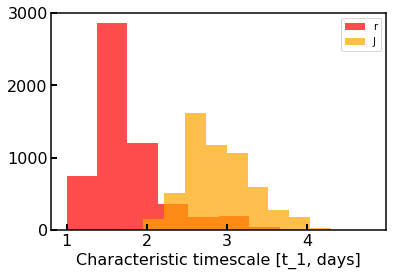

In [638]:
#plt.hist(g['t_1'],color='blue',alpha=0.7,label='g')

plt.hist(r['t_1'],color='red',alpha=0.7,label='r')
plt.hist(J['t_1'],color='orange',alpha=0.7,label='J')
plt.legend(fontsize=10)
plt.xlabel('Characteristic timescale [t_1, days]')
#plt.savefig('hist_t_1.png',bbox_inches='tight')

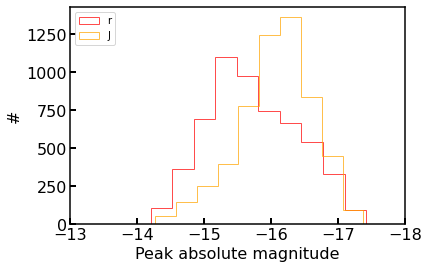

In [639]:
#plt.hist(g['peak_mag'],color='blue',alpha=0.7,label='g',histtype='step')
plt.hist(r['peak_mag'],color='red',alpha=0.7,label='r',histtype='step')
plt.hist(J['peak_mag'],color='orange',alpha=0.7,label='J',histtype='step')
plt.legend(fontsize=10)
plt.xlabel('Peak absolute magnitude')
plt.xlim(-13,-18)
plt.ylabel('#')
#plt.savefig('hist_peak_mags.png',bbox_inches='tight')

In [337]:
thetas = np.unique(J['theta'])
phis = np.unique(J['phi'])
mej_dyns = np.unique(J['mej_dyn'])
mej_winds = np.unique(J['mej_wind'])

      theta      
-----------------
              0.0
41.40962210927086
60.00000000000001
75.52248781407008
             90.0       peak_mag     
-------------------
-15.092140180064474
-14.819166730344577
 -14.69113026602972
-14.583255405005573
-14.420080402357593


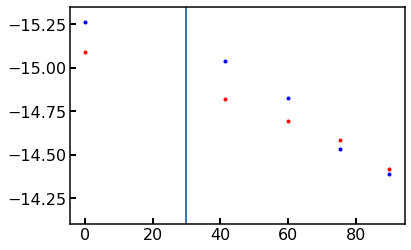

In [206]:
tablelist = [r,J]
cols = ['blue','red','orange']
for ind in range(len(tablelist)):
    t = tablelist[ind]
    phi = phis[0]
    t1 = t[(t['phi']==phi) & (t['mej_dyn']==mej_dyns[0]) & (t['mej_wind']==mej_winds[0])]
    t1.sort('theta')
    plt.plot(t1['theta'],t1['peak_mag'],'.',c=cols[ind])
    plt.axvline(phi)
plt.ylim(-14.1,-15.35)
print(t1['theta'],t1['peak_mag'])

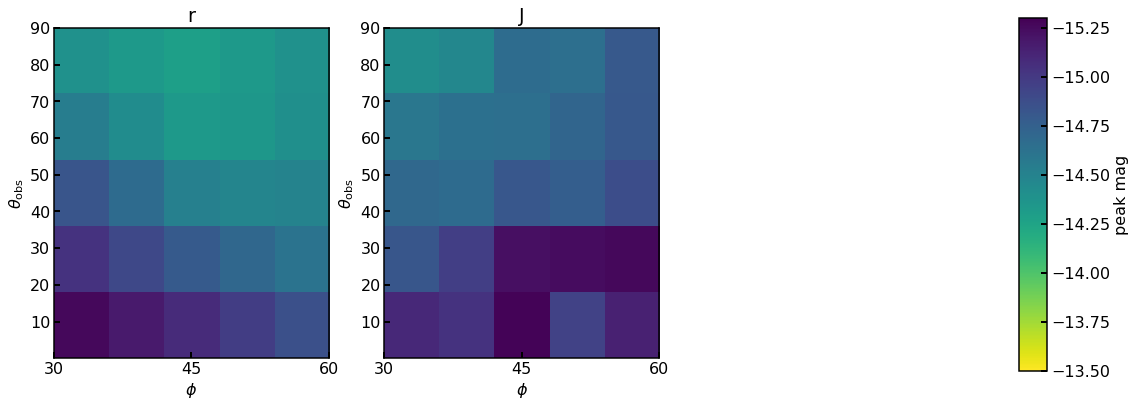

In [207]:
tablelist = [r,J]
cols = ['red','orange']
labs = ['r','J']
fig = plt.figure(figsize=(20,7))
gs = GridSpec(1,3,hspace=0.1)
pmarrays = []
for ind in range(len(tablelist)):
    t = tablelist[ind]
    phi = phis[0]
    t1 = t[(t['mej_dyn']==mej_dyns[0]) & (t['mej_wind']==mej_winds[0])]
    pmarray = []
    for th in thetas:
        t2 = t1[t1['theta']==th]
        t2.sort('phi')
        pmarray.append(t2['peak_mag'])
    #plt.plot(t1['theta'],t1['peak_mag'],'.',c=cols[ind])
    ax = fig.add_subplot(gs[ind])
    im = ax.imshow(pmarray,extent=[phis.min(),phis.max(),thetas.min(),thetas.max()],origin='lower',aspect=0.4,vmin=-15.3,vmax=-13.5)
    plt.title(labs[ind])
    ax.set_yticks([10,20,30,40,50,60,70,80,90])
    ax.set_xticks([30,45,60])
    ax.set_xlabel(r'$\phi$')
    ax.set_ylabel(r'$\theta_{\rm{obs}}$')
    pmarrays.append(pmarray)
    #ax.colorbar()
fig.subplots_adjust(right=0.65,left=0)
cbar_ax = fig.add_axes([0.67,0.15,0.02,0.7])
cbar = fig.colorbar(im,cax=cbar_ax)
cbar.set_label('peak mag')
cbar.ax.invert_yaxis()
#plt.savefig('peak_mags_mej.png',bbox_inches='tight')

In [23]:
#mej_dyns = mej_dyns[mej_dyns<0.01]
#mej_dyns

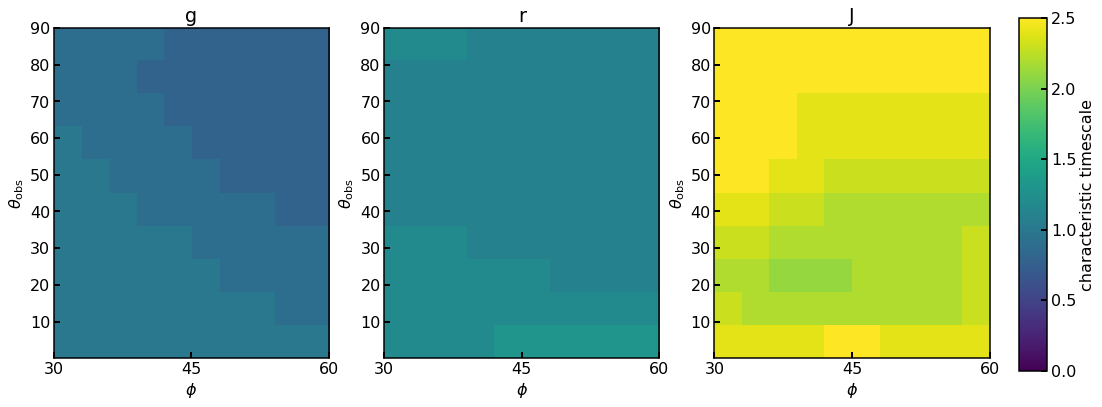

In [435]:
tablelist = [g,r,J]
cols = ['blue','red','orange']
labs = ['g','r','J']
fig = plt.figure(figsize=(20,7))
gs = GridSpec(1,3,hspace=0.1)
for ind in range(len(tablelist)):
    t = tablelist[ind]
    phi = phis[9]
    t1 = t[(t['mej_dyn']==mej_dyns[1]) & (t['mej_wind']==mej_winds[1])]
    pmarray = []
    for th in thetas:
        t2 = t1[t1['theta']==th]
        t2.sort('phi')
        pmarray.append(t2['t_1'])
    #plt.plot(t1['theta'],t1['peak_mag'],'.',c=cols[ind])
    ax = fig.add_subplot(gs[ind])
    im = ax.imshow(pmarray,extent=[phis.min(),phis.max(),thetas.min(),thetas.max()],origin='lower',aspect=0.4,vmin=0,vmax=2.5)
    plt.title(labs[ind])
    ax.set_yticks([10,20,30,40,50,60,70,80,90])
    ax.set_xticks([30,45,60])
    ax.set_xlabel(r'$\phi$')
    ax.set_ylabel(r'$\theta_{\rm{obs}}$')
    #ax.colorbar()
fig.subplots_adjust(right=0.65,left=0)
cbar_ax = fig.add_axes([0.67,0.15,0.02,0.7])
cbar = fig.colorbar(im,cax=cbar_ax)
cbar.set_label('characteristic timescale')
#cbar.ax.invert_yaxis()
#plt.savefig('peak_mags.png',bbox_inches='tight')

In [436]:
pmarrays = np.array(pmarrays)

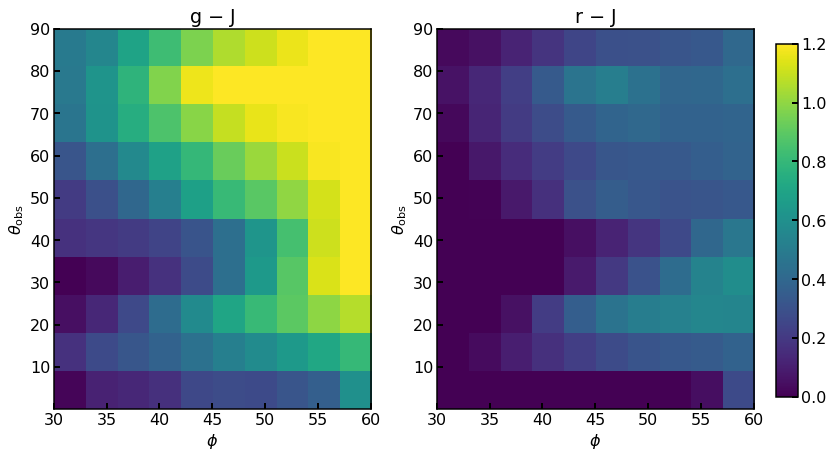

In [437]:
gs = GridSpec(1,2,hspace=0.1)
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(gs[0])
im = ax.imshow(pmarrays[0] - pmarrays[2],extent=[phis.min(),phis.max(),thetas.min(),thetas.max()],origin='lower',aspect=0.4,vmin=0,vmax=1.2)
plt.title('g $-$ J')
ax.set_yticks([10,20,30,40,50,60,70,80,90])
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'$\theta_{\rm{obs}}$')

ax = fig.add_subplot(gs[1])
im = ax.imshow(pmarrays[1] - pmarrays[2],extent=[phis.min(),phis.max(),thetas.min(),thetas.max()],origin='lower',aspect=0.4,vmin=0,vmax=1.2)
plt.title('r $-$ J')
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'$\theta_{\rm{obs}}$')
ax.set_yticks([10,20,30,40,50,60,70,80,90])

fig.subplots_adjust(right=0.65,left=0)
cbar_ax = fig.add_axes([0.67,0.15,0.02,0.7])
cbar = fig.colorbar(im,cax=cbar_ax)
plt.savefig('color_angles.png',bbox_inches='tight')

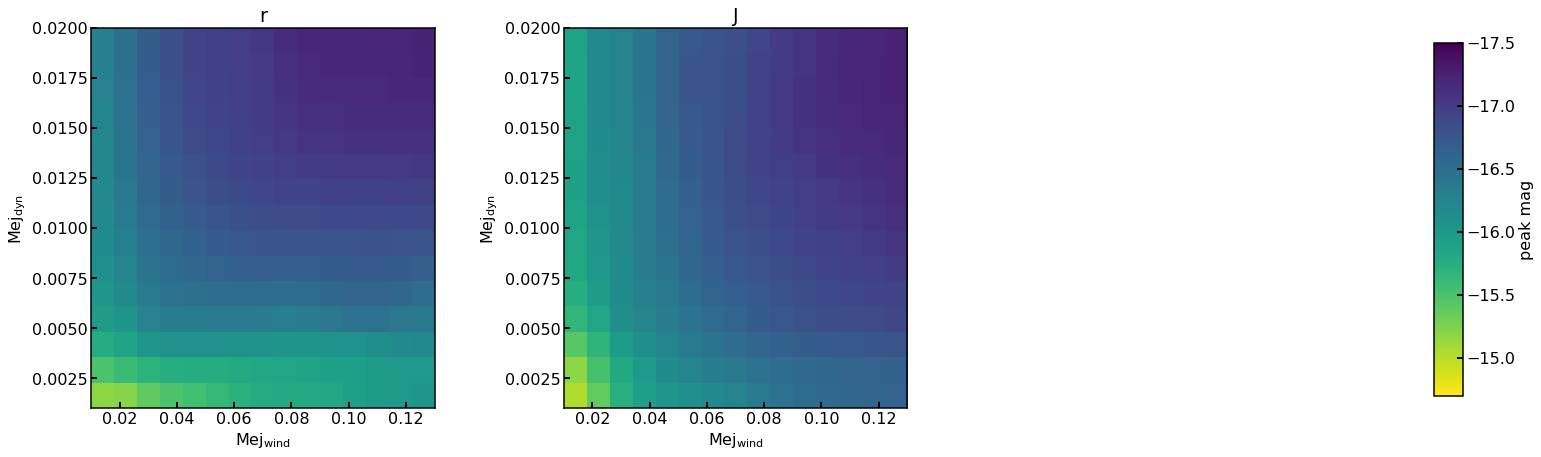

In [34]:
#tablelist = [g,r,J]
#cols = ['blue','red','orange']
#labs = ['g','r','J']
tablelist = [r,J]
cols = ['red','orange']
labs = ['r','J']


fig = plt.figure(figsize=(20,7))
gs = GridSpec(1,3,hspace=0.2)
pmarrays = []
for ind in range(len(tablelist)):
    t = tablelist[ind]
    phi = phis[1]
    t1 = t[(t['theta']==thetas[0]) & (t['phi']==phis[1])]
    pmarray = []
    for md in mej_dyns:
        t2 = t1[t1['mej_dyn']==md]
        t2.sort('mej_wind')
        pmarray.append(t2['peak_mag'])
    #plt.plot(t1['theta'],t1['peak_mag'],'.',c=cols[ind])
    ax = fig.add_subplot(gs[ind])
    im = ax.imshow(pmarray,extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',aspect=7,vmin=-17.5,vmax=-14.7)
    plt.title(labs[ind])
    #ax.set_yticks([10,20,30,40,50,60,70,80,90])
    ax.set_xticks([0.02,0.04,0.06,0.08,0.1,0.12])
    ax.set_xlabel(r'Mej$_{\rm{wind}}$')
    ax.set_ylabel(r'Mej$_{\rm{dyn}}$')
    pmarrays.append(pmarray)
    #ax.colorbar()
fig.subplots_adjust(right=0.93,left=0)
cbar_ax = fig.add_axes([0.95,0.15,0.02,0.7])
cbar = fig.colorbar(im,cax=cbar_ax)
cbar.set_label('peak mag')
cbar.ax.invert_yaxis()
#plt.savefig('peak_mags_mej2.png',bbox_inches='tight')

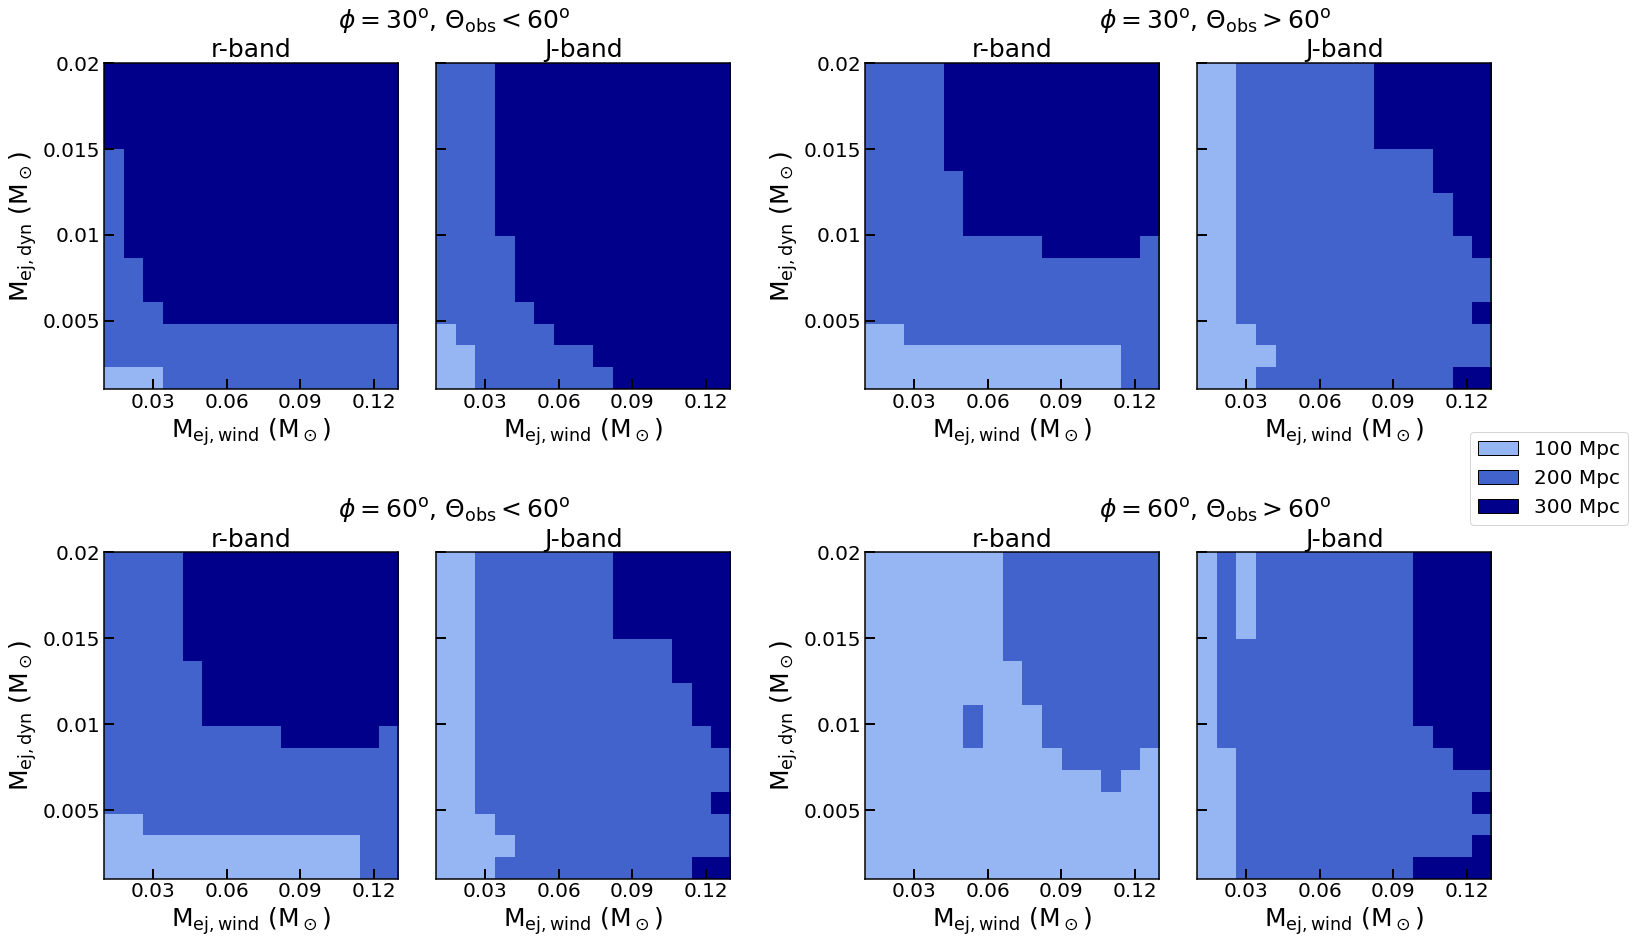

In [384]:
#tablelist = [g,r,J]
#cols = ['blue','red','orange']
#labs = ['g','r','J']
#cmap = colors.LinearSegmentedColormap.from_list("",['mediumturquoise','cornflowerblue','darkblue'])
cmap = colors.LinearSegmentedColormap.from_list("",['ghostwhite','cornflowerblue','darkblue'])
tablelist = [r,J]
cols = ['red','orange']
labs = ['r','J']

fig = plt.figure(figsize=(25,15))
gs = GridSpec(2,2,hspace=0.5,wspace=0.2)
dist = np.array([100,200,300]) #Mpc
DMs = 5*np.log10(dist*1e6/10)
pmarrays = []
axs = []
is_dets = [[],[]]

is_dets = [[],[]]
gs1 = gs[0].subgridspec(1,2,wspace=0.1)
for DM in DMs:
    for ind in range(len(tablelist)):
        t = tablelist[ind]
        phi = phis[0]
        t1 = t[(t['theta']>=0) & (t['theta']<60) & (t['phi']==phi)]
        pmarray = []
        for md in mej_dyns:
            t2 = t1[t1['mej_dyn']==md]
            t2.sort('mej_wind')
            t2 = t2.group_by('mej_wind')
            pmbins = []
            for grp in t2.groups:
                pmbins.append(np.min(grp['peak_mag'])+DM)
            pmarray.append(pmbins)
        #plt.plot(t1['theta'],t1['peak_mag'],'.',c=cols[ind])
        pmarray = np.array(pmarray)
        #ax = fig.add_subplot(gs[ind])
        is_det = (pmarray<21)
        is_dets[ind].append(is_det)

is_detected_r = 0 + is_dets[0][0] + is_dets[0][1] + is_dets[0][2]
is_detected_J = 0 + is_dets[1][0] + is_dets[1][1] + is_dets[1][2]

ax = fig.add_subplot(gs1[0])
im = ax.imshow(is_detected_r,extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',aspect=7,vmin=0,vmax=3,cmap=cmap)
plt.title('%s-band'%(labs[0]),size=25)
ax.set_xticks([0.03,0.06,0.09,0.12])
ax.set_xticklabels([0.03,0.06,0.09,0.12],size=20)
ax.set_xlabel(r'M$_{\rm{ej, wind}}$ (M$_\odot$)',size=25)
ax.set_ylabel(r'M$_{\rm{ej, dyn}}$ (M$_\odot$)',size=25)
ax.set_yticks([0.005,0.01,0.015,0.02])
ax.set_yticklabels([0.005,0.01,0.015,0.02],size=20)
ax.tick_params(size=10)

ax = fig.add_subplot(gs1[1])
im = ax.imshow(is_detected_J,extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',aspect=7,vmin=0,vmax=3,cmap=cmap)

plt.title('%s-band'%(labs[1]),size=25)
#ax.set_yticks([0.005,0.01,0.015,0.02])
ax.set_xticks([0.03,0.06,0.09,0.12])
ax.set_xticklabels([0.03,0.06,0.09,0.12],size=20)
ax.set_xlabel(r'M$_{\rm{ej, wind}}$ (M$_\odot$)',size=25)
ax.set_yticks([0.005,0.01,0.015,0.02])
ax.set_yticklabels([],size=12)
ax.tick_params(size=10)
pmarrays.append(pmarray)
ax.text(-0.03,0.022,r'$\phi = 30^{\rm{o}}$, $\Theta_{\rm{obs}} < 60^{\rm{o}}$',size=25)

is_dets = [[],[]]
gs1 = gs[1].subgridspec(1,2,wspace=0.1)
for DM in DMs:
    for ind in range(len(tablelist)):
        t = tablelist[ind]
        phi = phis[0]
        t1 = t[(t['theta']>=60) & (t['theta']<90) & (t['phi']==phi)]
        pmarray = []
        for md in mej_dyns:
            t2 = t1[t1['mej_dyn']==md]
            t2.sort('mej_wind')
            t2 = t2.group_by('mej_wind')
            pmbins = []
            for grp in t2.groups:
                pmbins.append(np.min(grp['peak_mag'])+DM)
            pmarray.append(pmbins)
        #plt.plot(t1['theta'],t1['peak_mag'],'.',c=cols[ind])
        pmarray = np.array(pmarray)
        #ax = fig.add_subplot(gs[ind])
        is_det = (pmarray<21)
        is_dets[ind].append(is_det)

is_detected_r = 0 + is_dets[0][0] + is_dets[0][1] + is_dets[0][2]
is_detected_J = 0 + is_dets[1][0] + is_dets[1][1] + is_dets[1][2]

ax = fig.add_subplot(gs1[0])
im = ax.imshow(is_detected_r,extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',aspect=7,vmin=0,vmax=3,cmap=cmap)
plt.title('%s-band'%(labs[0]),size=25)
ax.set_xticks([0.03,0.06,0.09,0.12])
ax.set_xticklabels([0.03,0.06,0.09,0.12],size=20)
ax.set_xlabel(r'M$_{\rm{ej, wind}}$ (M$_\odot$)',size=25)
ax.set_ylabel(r'M$_{\rm{ej, dyn}}$ (M$_\odot$)',size=25)
ax.set_yticks([0.005,0.01,0.015,0.02])
ax.set_yticklabels([0.005,0.01,0.015,0.02],size=20)
ax.tick_params(size=10)

ax = fig.add_subplot(gs1[1])
im = ax.imshow(is_detected_J,extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',aspect=7,vmin=0,vmax=3,cmap=cmap)

plt.title('%s-band'%(labs[1]),size=25)
#ax.set_yticks([0.005,0.01,0.015,0.02])
ax.set_xticks([0.03,0.06,0.09,0.12])
ax.set_xticklabels([0.03,0.06,0.09,0.12],size=20)
ax.set_xlabel(r'M$_{\rm{ej, wind}}$ (M$_\odot$)',size=25)
ax.set_yticks([0.005,0.01,0.015,0.02])
ax.set_yticklabels([],size=12)
ax.tick_params(size=10)
pmarrays.append(pmarray)
ax.text(-0.03,0.022,r'$\phi = 30^{\rm{o}}$, $\Theta_{\rm{obs}} > 60^{\rm{o}}$',size=25)

gs1 = gs[2].subgridspec(1,2,wspace=0.1)
for DM in DMs:
    for ind in range(len(tablelist)):
        t = tablelist[ind]
        phi = phis[-1]
        t1 = t[(t['theta']>=0) & (t['theta']<60) & (t['phi']==phi)]
        pmarray = []
        for md in mej_dyns:
            t2 = t1[t1['mej_dyn']==md]
            t2.sort('mej_wind')
            t2 = t2.group_by('mej_wind')
            pmbins = []
            for grp in t2.groups:
                pmbins.append(np.min(grp['peak_mag'])+DM)
            pmarray.append(pmbins)
        #plt.plot(t1['theta'],t1['peak_mag'],'.',c=cols[ind])
        pmarray = np.array(pmarray)
        #ax = fig.add_subplot(gs[ind])
        is_det = (pmarray<21)
        is_dets[ind].append(is_det)

is_detected_r = 0 + is_dets[0][0] + is_dets[0][1] + is_dets[0][2]
is_detected_J = 0 + is_dets[1][0] + is_dets[1][1] + is_dets[1][2]

ax = fig.add_subplot(gs1[0])
im = ax.imshow(is_detected_r,extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',aspect=7,vmin=0,vmax=3,cmap=cmap)
plt.title('%s-band'%(labs[0]),size=25)
ax.set_xticks([0.03,0.06,0.09,0.12])
ax.set_xticklabels([0.03,0.06,0.09,0.12],size=20)
ax.set_xlabel(r'M$_{\rm{ej, wind}}$ (M$_\odot$)',size=25)
ax.set_ylabel(r'M$_{\rm{ej, dyn}}$ (M$_\odot$)',size=25)
ax.set_yticks([0.005,0.01,0.015,0.02])
ax.set_yticklabels([0.005,0.01,0.015,0.02],size=20)
ax.tick_params(size=10)

ax = fig.add_subplot(gs1[1])
#cmap = colors.ListedColormap(['lightsteelblue','royalblue','pink'])
im = ax.imshow(is_detected_J,extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',aspect=7,vmin=0,vmax=3,cmap=cmap)

plt.title('%s-band'%(labs[1]),size=25)
#ax.set_yticks([0.005,0.01,0.015,0.02])
ax.set_xticks([0.03,0.06,0.09,0.12])
ax.set_xticklabels([0.03,0.06,0.09,0.12],size=20)
ax.set_xlabel(r'M$_{\rm{ej, wind}}$ (M$_\odot$)',size=25)
ax.set_yticks([0.005,0.01,0.015,0.02])
ax.set_yticklabels([],size=12)
ax.tick_params(size=10)
pmarrays.append(pmarray)

ax.text(-0.03,0.022,r'$\phi = 60^{\rm{o}}$, $\Theta_{\rm{obs}} < 60^{\rm{o}}$',size=25)

is_dets = [[],[]]
gs1 = gs[3].subgridspec(1,2,wspace=0.1)
for DM in DMs:
    for ind in range(len(tablelist)):
        t = tablelist[ind]
        phi = phis[-1]
        t1 = t[(t['theta']>=60) & (t['theta']<90) & (t['phi']==phi)]
        pmarray = []
        for md in mej_dyns:
            t2 = t1[t1['mej_dyn']==md]
            t2.sort('mej_wind')
            t2 = t2.group_by('mej_wind')
            pmbins = []
            for grp in t2.groups:
                pmbins.append(np.min(grp['peak_mag'])+DM)
            pmarray.append(pmbins)
        #plt.plot(t1['theta'],t1['peak_mag'],'.',c=cols[ind])
        pmarray = np.array(pmarray)
        #ax = fig.add_subplot(gs[ind])
        is_det = (pmarray<21)
        is_dets[ind].append(is_det)

is_detected_r = 0 + is_dets[0][0] + is_dets[0][1] + is_dets[0][2]
is_detected_J = 0 + is_dets[1][0] + is_dets[1][1] + is_dets[1][2]

ax = fig.add_subplot(gs1[0])

im = ax.imshow(is_detected_r,extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',aspect=7,vmin=0,vmax=3,cmap=cmap)
plt.title('%s-band'%(labs[0]),size=25)
ax.set_xticks([0.03,0.06,0.09,0.12])
ax.set_xticklabels([0.03,0.06,0.09,0.12],size=20)
ax.set_xlabel(r'M$_{\rm{ej, wind}}$ (M$_\odot$)',size=25)
ax.set_ylabel(r'M$_{\rm{ej, dyn}}$ (M$_\odot$)',size=25)
ax.set_yticks([0.005,0.01,0.015,0.02])
ax.set_yticklabels([0.005,0.01,0.015,0.02],size=20)
ax.tick_params(size=10)

ax = fig.add_subplot(gs1[1])

#cmap = colors.ListedColormap(['lightsteelblue','royalblue','navy'])

im = ax.imshow(is_detected_J,extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',aspect=7,vmin=0,vmax=3,cmap=cmap)

plt.title('%s-band'%(labs[1]),size=25)
#ax.set_yticks([0.005,0.01,0.015,0.02])
ax.set_xticks([0.03,0.06,0.09,0.12])
ax.set_xticklabels([0.03,0.06,0.09,0.12],size=20)
ax.set_xlabel(r'M$_{\rm{ej, wind}}$ (M$_\odot$)',size=25)
ax.set_yticks([0.005,0.01,0.015,0.02])
ax.set_yticklabels([],size=12)
ax.tick_params(size=10)

#ax.set_ylabel(r'Mej$_{\rm{dyn}}$',size=18)
pmarrays.append(pmarray)

ax.text(-0.03,0.022,r'$\phi = 60^{\rm{o}}$, $\Theta_{\rm{obs}} > 60^{\rm{o}}$',size=25)

#fig.subplots_adjust(right=0.8,left=0)
#cbar_ax = fig.add_axes([0.95,0.15,0.02,0.7])
#cbar = fig.colorbar(im,cax=cbar_ax)
#cbar.set_label('brighter than 21 mag')
#cbar.ax.invert_yaxis()

patch100 = mpatches.Patch(facecolor='#95b6f3',edgecolor='black',label=r'100 Mpc')
patch200 = mpatches.Patch(facecolor='#4263cc',edgecolor='black',label=r'200 Mpc')
patch300 = mpatches.Patch(facecolor='#00008b',edgecolor='black',label=r'300 Mpc')
plt.legend(handles=[patch100,patch200,patch300],bbox_to_anchor=(1.5,1.4),fontsize=20)
plt.savefig('parameters_2.png',bbox_inches='tight')

In [214]:
for row in grp:
    print(row['t'][row['mag'][0]+DM < 21])

[1.9 2.  2.1 2.2]
[1.6 1.7 1.9 2.  2.1 2.2 2.3 2.4]


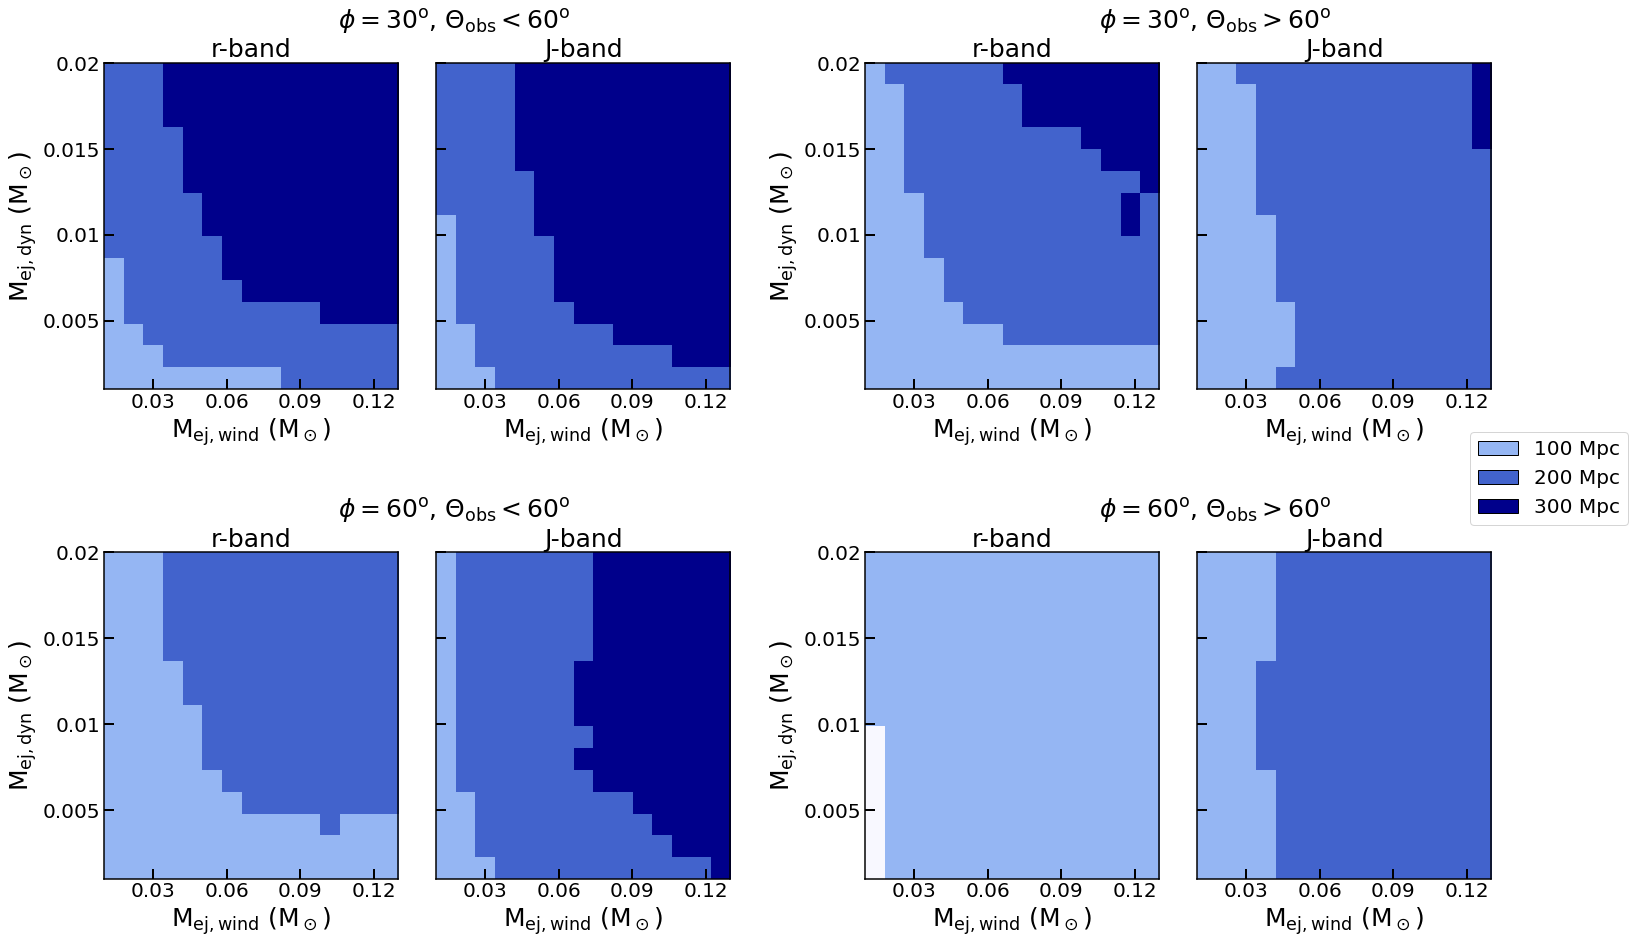

In [264]:
cmap = colors.LinearSegmentedColormap.from_list("",['ghostwhite','cornflowerblue','darkblue'])
tablelist = [r,J]
cols = ['red','orange']
labs = ['r','J']

fig = plt.figure(figsize=(25,15))
gs = GridSpec(2,2,hspace=0.5,wspace=0.2)
dist = np.array([100,200,300]) #Mpc
DMs = 5*np.log10(dist*1e6/10)
pmarrays = []
axs = []
is_dets = [[],[]]

is_dets = [[],[]]
gs1 = gs[0].subgridspec(1,2,wspace=0.1)


phi_plots = [phis[0],phis[-1]]
theta_plot_lims = [(0,60),(60,90)]
enum = -1
for phi_val in phi_plots:
    for theta_lim in theta_plot_lims:
        enum = enum+1
        pmarrays = []
        is_dets = [[],[]]
        gs1 = gs[enum].subgridspec(1,2,wspace=0.1)
        for DM in DMs:
            for ind in range(len(tablelist)):
                t = tablelist[ind]
                phi = phi_val
                t1 = t[(t['theta']>=theta_lim[0]) & (t['theta']<theta_lim[1]) & (t['phi']==phi)]
                pmarray = []
                tinits = []
                t_21s = []
                for md in mej_dyns:
                    t2 = t1[t1['mej_dyn']==md]
                    t2.sort('mej_wind')
                    t2 = t2.group_by('mej_wind')
                    pmbins = []
                    t21_bins = []
                    tinit_bins = []
                    for grp in t2.groups:
                        t21 = []
                        tinit = []
                        for row in grp:
                            a = row['t'][row['mag'][0]+DM < 21]
                            if len(a) == 0:
                                t21.append(0)
                                tinit.append(0)
                            else:
                                t21.append(a[-1]-a[0])
                                tinit.append(a[0])
                        
                        t21_bins.append(np.max(t21))
                        tinit_bins.append(np.min(tinit))
                        pmbins.append(np.min(grp['peak_mag'])+DM)
                    pmarray.append(pmbins)
                    tinits.append(tinit_bins)
                    t_21s.append(t21_bins)
                #plt.plot(t1['theta'],t1['peak_mag'],'.',c=cols[ind])
                pmarray = np.array(pmarray)
                t_21s = np.array(t_21s)
                tinits = np.array(tinits)
                #ax = fig.add_subplot(gs[ind])
                if ind == 0:
                    is_det = (pmarray<21) & (t_21s>1)
                else:
                    is_det = (pmarray<21) & (t_21s>1)
                is_dets[ind].append(is_det)

        is_detected_r = 0 + is_dets[0][0] + is_dets[0][1] + is_dets[0][2]
        is_detected_J = 0 + is_dets[1][0] + is_dets[1][1] + is_dets[1][2]
        
        ax = fig.add_subplot(gs1[0])
        im = ax.imshow(is_detected_r,extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',aspect=7,vmin=0,vmax=3,cmap=cmap)
        plt.title('%s-band'%(labs[0]),size=25)
        ax.set_xticks([0.03,0.06,0.09,0.12])
        ax.set_xticklabels([0.03,0.06,0.09,0.12],size=20)
        ax.set_xlabel(r'M$_{\rm{ej, wind}}$ (M$_\odot$)',size=25)
        ax.set_ylabel(r'M$_{\rm{ej, dyn}}$ (M$_\odot$)',size=25)
        ax.set_yticks([0.005,0.01,0.015,0.02])
        ax.set_yticklabels([0.005,0.01,0.015,0.02],size=20)
        ax.tick_params(size=10)
        
        ax = fig.add_subplot(gs1[1])
        im = ax.imshow(is_detected_J,extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',aspect=7,vmin=0,vmax=3,cmap=cmap)
        
        plt.title('%s-band'%(labs[1]),size=25)
        #ax.set_yticks([0.005,0.01,0.015,0.02])
        ax.set_xticks([0.03,0.06,0.09,0.12])
        ax.set_xticklabels([0.03,0.06,0.09,0.12],size=20)
        ax.set_xlabel(r'M$_{\rm{ej, wind}}$ (M$_\odot$)',size=25)
        ax.set_yticks([0.005,0.01,0.015,0.02])
        ax.set_yticklabels([],size=12)
        ax.tick_params(size=10)
        pmarrays.append(pmarray)
        sign = '>'
        if theta_lim[1] == 60:
            sign = '<'
        ax.text(-0.03,0.022,r'$\phi = %i^{\rm{o}}$, $\Theta_{\rm{obs}} %s %s^{\rm{o}}$'%(phi,sign,60),size=25)

patch100 = mpatches.Patch(facecolor='#95b6f3',edgecolor='black',label=r'100 Mpc')
patch200 = mpatches.Patch(facecolor='#4263cc',edgecolor='black',label=r'200 Mpc')
patch300 = mpatches.Patch(facecolor='#00008b',edgecolor='black',label=r'300 Mpc')
plt.legend(handles=[patch100,patch200,patch300],bbox_to_anchor=(1.5,1.4),fontsize=20)
plt.savefig('parameters_1days.png')

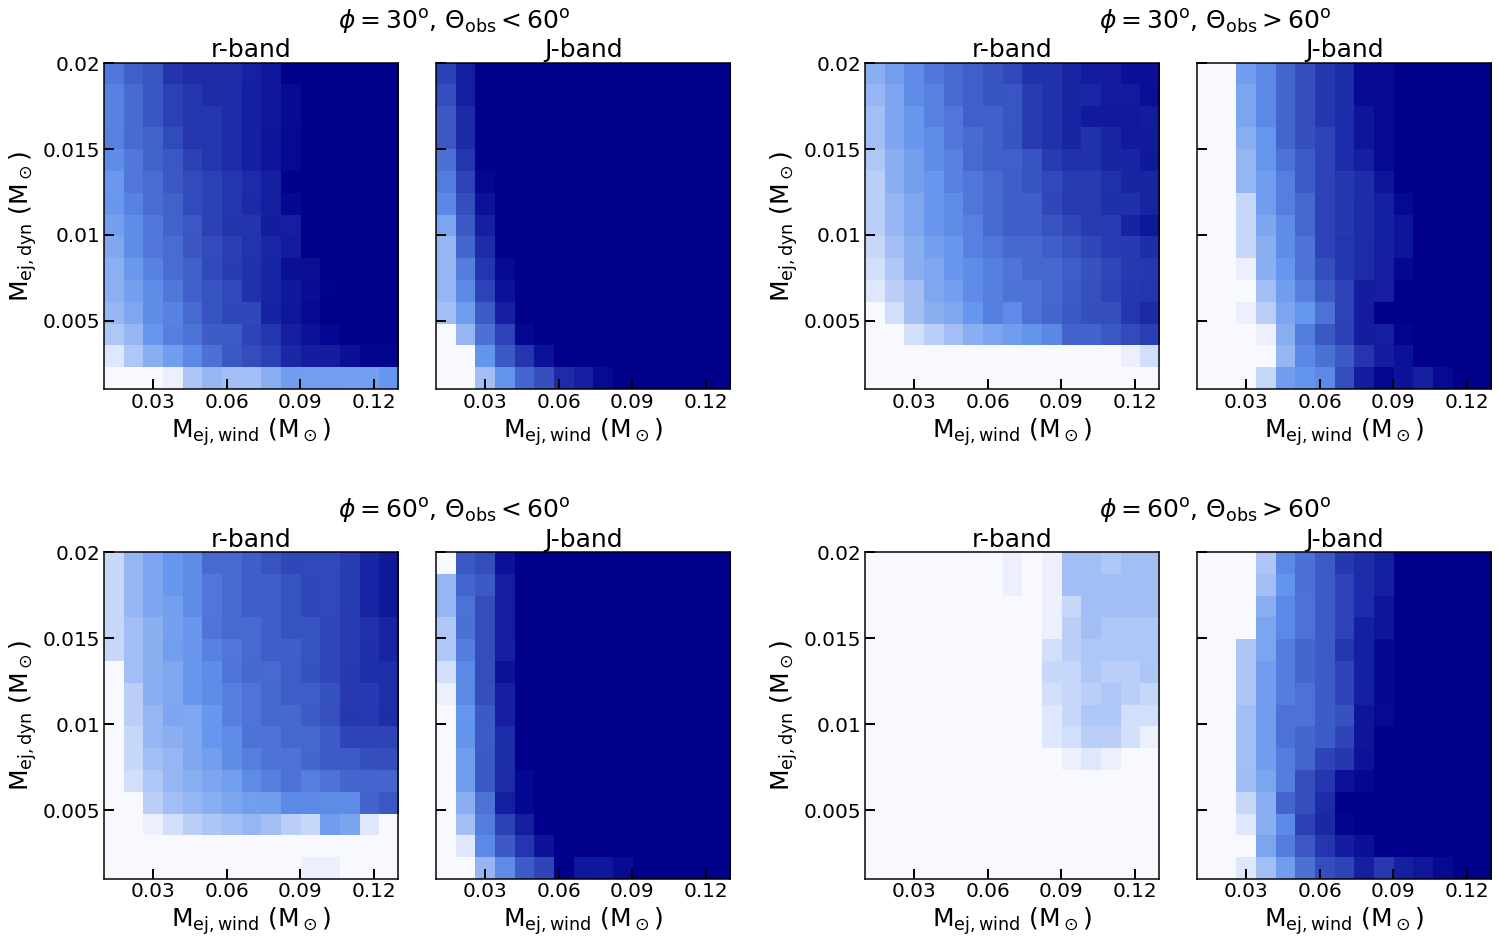

In [261]:
cmap = colors.LinearSegmentedColormap.from_list("",['ghostwhite','cornflowerblue','darkblue'])
tablelist = [r,J]
cols = ['red','orange']
labs = ['r','J']

fig = plt.figure(figsize=(25,15))
gs = GridSpec(2,2,hspace=0.5,wspace=0.2)
dist = np.array([200]) #Mpc
DMs = 5*np.log10(dist*1e6/10)
pmarrays = []
axs = []

gs1 = gs[0].subgridspec(1,2,wspace=0.1)


phi_plots = [phis[0],phis[-1]]
theta_plot_lims = [(0,60),(60,90)]
enum = -1
for phi_val in phi_plots:
    for theta_lim in theta_plot_lims:
        enum = enum+1
        pmarrays = []
        is_dets = [[],[]]
        gs1 = gs[enum].subgridspec(1,2,wspace=0.1)
        t_21_filts = [[],[]]
        tinit_filts = [[],[]]
        for DM in DMs:
            for ind in range(len(tablelist)):
                t = tablelist[ind]
                phi = phi_val
                t1 = t[(t['theta']==theta_lim[0]) & (t['theta']<theta_lim[1]) & (t['phi']==phi)]
                pmarray = []
                tinits = []
                t_21s = []
                for md in mej_dyns:
                    t2 = t1[t1['mej_dyn']==md]
                    t2.sort('mej_wind')
                    t2 = t2.group_by('mej_wind')
                    pmbins = []
                    t21_bins = []
                    tinit_bins = []
                    for grp in t2.groups:
                        t21 = []
                        tinit = []
                        for row in grp:
                            a = row['t'][row['mag'][0]+DM < 21]
                            if len(a) == 0:
                                t21.append(0)
                                tinit.append(0)
                            else:
                                t21.append(a[-1]-a[0])
                                tinit.append(a[0])
                        
                        t21_bins.append(np.max(t21))
                        tinit_bins.append(np.min(tinit))
                        pmbins.append(np.min(grp['peak_mag'])+DM)
                    pmarray.append(pmbins)
                    tinits.append(tinit_bins)
                    t_21s.append(t21_bins)
                #plt.plot(t1['theta'],t1['peak_mag'],'.',c=cols[ind])
                pmarray = np.array(pmarray)
                t_21s = np.array(t_21s)
                tinits = np.array(tinits)
                #ax = fig.add_subplot(gs[ind])
                pmarray = np.where(pmarray>21,0,pmarray)
                t_21_filts[ind] = t_21s*pmarray
                tinit_filts[ind] = tinits
        is_detected_r = t_21_filts[0]
        is_detected_J = t_21_filts[1]

                
        ax = fig.add_subplot(gs1[0])
        im = ax.imshow(is_detected_r,extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',aspect=7,vmin=0,vmax=50,cmap=cmap)
        plt.title('%s-band'%(labs[0]),size=25)
        ax.set_xticks([0.03,0.06,0.09,0.12])
        ax.set_xticklabels([0.03,0.06,0.09,0.12],size=20)
        ax.set_xlabel(r'M$_{\rm{ej, wind}}$ (M$_\odot$)',size=25)
        ax.set_ylabel(r'M$_{\rm{ej, dyn}}$ (M$_\odot$)',size=25)
        ax.set_yticks([0.005,0.01,0.015,0.02])
        ax.set_yticklabels([0.005,0.01,0.015,0.02],size=20)
        ax.tick_params(size=10)
        
        ax = fig.add_subplot(gs1[1])
        im = ax.imshow(is_detected_J,extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',aspect=7,vmin=0,vmax=50,cmap=cmap)
        
        plt.title('%s-band'%(labs[1]),size=25)
        #ax.set_yticks([0.005,0.01,0.015,0.02])
        ax.set_xticks([0.03,0.06,0.09,0.12])
        ax.set_xticklabels([0.03,0.06,0.09,0.12],size=20)
        ax.set_xlabel(r'M$_{\rm{ej, wind}}$ (M$_\odot$)',size=25)
        ax.set_yticks([0.005,0.01,0.015,0.02])
        ax.set_yticklabels([],size=12)
        ax.tick_params(size=10)
        pmarrays.append(pmarray)
        sign = '>'
        if theta_lim[1] == 60:
            sign = '<'
        ax.text(-0.03,0.022,r'$\phi = %i^{\rm{o}}$, $\Theta_{\rm{obs}} %s %s^{\rm{o}}$'%(phi,sign,60),size=25)
#patch100 = mpatches.Patch(facecolor='#95b6f3',edgecolor='black',label=r'100 Mpc')
#patch200 = mpatches.Patch(facecolor='#4263cc',edgecolor='black',label=r'200 Mpc')
#patch300 = mpatches.Patch(facecolor='#00008b',edgecolor='black',label=r'300 Mpc')
#plt.legend(handles=[patch100,patch200,patch300],bbox_to_anchor=(1.5,1.4),fontsize=20)

In [260]:
pmarray

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , 20.97699907, 20.90102612, 20.84549576, 20.80264106],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , 20.99247669],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , 20.99714576],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , 

In [474]:
dist = 200 #Mpc
DM = 5*np.log10(dist*1e6/10)
t_21s = []
for row in r:
    tbrights = row['t'][(row['mag'][0]+DM<21)]
    if len(tbrights) == 0:
        t_21s.append(0)
    else:
        t_1 = tbrights.max() - tbrights.min()
        t_21s.append(t_1)

In [475]:
r['t_21'] = t_21s

In [36]:
tablelist = [g,r,J]
cols = ['blue','red','orange']
labs = ['g','r','J']
fig = plt.figure(figsize=(20,7))
gs = GridSpec(1,3,hspace=0.2)
dist = 180 #Mpc
DM = 5*np.log10(dist*1e6/10)
pmarrays = []
atimes = [0.5,0.5,1]
for ind in range(len(tablelist)):
    t = tablelist[ind]
    phi = phis[9]
    t1 = t[(t['theta']>60) & (t['theta']<90) & (t['phi']==phi)]
    pmarray = []
    ptarray = []
    for md in mej_dyns:
        t2 = t1[t1['mej_dyn']==md]
        t2.sort('mej_wind')
        pmarray.append(t2['peak_mag']+DM)
        ptarray.append(t2['t_21'])
    #plt.plot(t1['theta'],t1['peak_mag'],'.',c=cols[ind])
    pmarray = np.array(pmarray)
    ptarray = np.array(ptarray)
    ax = fig.add_subplot(gs[ind])
    crit = (pmarray<21) #& (ptarray>=atimes[ind])
    im = ax.imshow(crit,extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',aspect=1.6,vmin=0,vmax=1,cmap='Blues')
    plt.title(labs[ind])
    #ax.set_yticks([0.002,0.004,0.006,0.008])
    #ax.set_xticks([0.01,0.015,0.02,0.025])
    ax.set_xticks([0.02,0.04,0.06,0.08,0.1,0.12])
    ax.set_xlabel(r'Mej$_{\rm{wind}}$')
    ax.set_ylabel(r'Mej$_{\rm{dyn}}$')
    pmarrays.append(pmarray)
    #ax.colorbar()
fig.subplots_adjust(right=0.93,left=0)
cbar_ax = fig.add_axes([0.95,0.15,0.02,0.7])
cbar = fig.colorbar(im,cax=cbar_ax)
cbar.set_label('brighter than 21 mag')
#cbar.ax.invert_yaxis()
#plt.savefig('pdets_phi0_th60to90.png',bbox_inches='tight')

NameError: name 'g' is not defined

In [493]:
ptarray[crit]

array([], dtype=float64)

In [501]:
dat = ascii.read('bns_samples_realistic_ejecta_masses.dat')

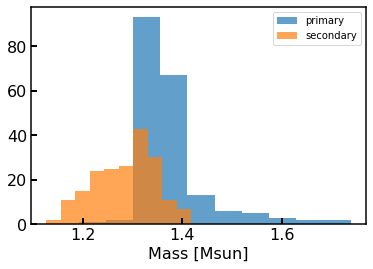

In [502]:
plt.hist(dat['m1'],alpha=0.7,label='primary')
plt.hist(dat['m2'],alpha=0.7,label='secondary')
plt.xlabel('Mass [Msun]')
plt.legend(fontsize=10)
plt.savefig('input_mass_ratios.png',bbox_inches='tight')

(array([6569.,  267.,  486.,  573.,  383.,  639.,  555.,  328.,  168.,
          32.]),
 array([0.  , 0.18, 0.36, 0.54, 0.72, 0.9 , 1.08, 1.26, 1.44, 1.62, 1.8 ]),
 <BarContainer object of 10 artists>)

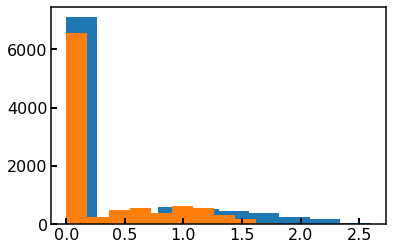

In [478]:
plt.hist(J['t_21'])
plt.hist(r['t_21'])

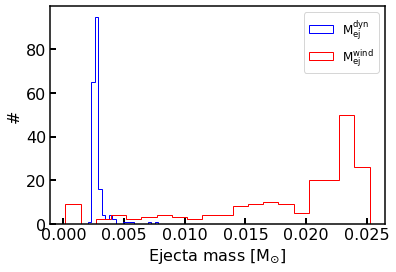

In [517]:
plt.hist(dat['mej_dyn'],bins=20,histtype='step',color='blue',label=r'M$_{\rm{ej}}^{\rm{dyn}}$')
plt.hist(dat['mej_wind'],bins=20,histtype='step',color='red',label=r'M$_{\rm{ej}}^{\rm{wind}}$')
plt.legend(fontsize=12)
plt.xlabel('Ejecta mass [M$_{\odot}$]')
plt.ylabel('#')
plt.savefig('ejecta_masses.pdf',bbox_inches='tight')

# Read schedule files

In [490]:
from astropy.table import Table, Column
from astropy.coordinates import SkyCoord
import astropy.units as u
import sys
sys.path.append('/Users/viraj/winter/gwemopt_sims/code/')
from winterTel import W_SNR_airmass

In [419]:
schFile = '/Users/viraj/winter/gwemopt_sims/output_parallel/realistic_isPE0_isGal0_isGalTiling0_1days.csv'
sched = Table.read(schFile)

In [420]:
sched = sched[sched['is_localized']==1]
crds = SkyCoord(ra=sched['ra'],dec=sched['dec'],unit=(u.deg,u.deg))

In [505]:
with open('/Users/viraj/gwemlightcurves/output/bns_samples_realistic_Jband_thetajn.dat','rb') as f:
    lcs = pickle.load(f)

In [506]:
lc_crds = SkyCoord(ra=lcs['ra'],dec=lcs['dec'],unit=(u.radian,u.radian))

idx,d2d,d3d = crds.match_to_catalog_sky(lc_crds)
mags_at_loc = []
mags_peak = []
SNRs_300 = []
SNRs_1800 = []
mags_to_use = []

for ind in range(len(lcs[idx])):
    lc = lcs[idx][ind]
    dist = lc['luminosity_distance_Mpc']
    DM = 5*np.log10(dist*1e6/10)
    m_apps = lc['mag'][0]+DM
    t_s = lc['t']
    t_max = t_s[np.argmin(m_apps)]
    
    t_loc = sched[ind]['hours_to_detection']/24
    mag_at_loc = np.interp(t_loc,t_s,m_apps)
    mag_peak = np.min(m_apps)
    if t_loc<t_max:
        mag_to_use = mag_peak
    else:
        mag_to_use = mag_at_loc
    
    SNR_300 = W_SNR_airmass(300,airmass=sched[ind]['airmass'],magnitude=mag_to_use)
    SNR_1800 = W_SNR_airmass(1800,airmass=sched[ind]['airmass'],magnitude=mag_to_use)
    
    SNRs_300.append(SNR_300)
    SNRs_1800.append(SNR_1800)
    mags_to_use.append(mag_to_use)
    mags_at_loc.append(mag_at_loc)
    mags_peak.append(mag_peak)
    

In [507]:
colnames = ['event','distance','ra','dec','is_localized','mag_threshold','airmass','pointings_to_detection','hours_to_detection','area90']
results = Table()
for col in colnames:
    results.add_column(sched[col])
results.add_column(Column(name='peak_mag_J',data=mags_peak))
results.add_column(Column(name='mag_at_detection_J',data=mags_at_loc))
results.add_column(Column(name='mag_used_J',data=mags_to_use))
results.add_column(Column(name='SNR_J_at_detection',data=SNRs_300))
results.add_column(Column(name='SNR_J_at_1800s',data=SNRs_1800))

is_detected = results['mag_used_J']<results['mag_threshold']
results.add_column(Column(name='is_detected',data=is_detected))
results.write('/Users/viraj/winter/gwemopt_sims/output_parallel/Bulla/{}_isPE{}_isGal{}_isGalTiling{}_{}days.csv'.format(rate, isPE, isGal, isGalTiling, numDays))

NameError: name 'rate' is not defined

# Make theta vs Area_90 plot

In [5]:
from glob import glob
from astropy.table import Table
import pickle
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u

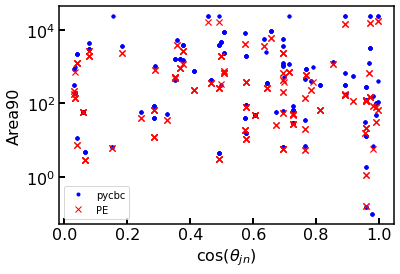

In [7]:
ls = glob('/Users/viraj/winter/gwemopt_sims/output_parallel/Bulla/*.csv')
A90 = []
pethetas = []
peA90 = []
thetas = []

for l in ls:
    isPe = int(l.split('/')[-1].split('_')[1].split('isPE')[-1])
    if isPe==1:
        t = Table.read(l)
        for row in t:
            pethetas.append(row['theta_jn'])
            peA90.append(row['area90'])
        
    else:
        t = Table.read(l)
        for row in t:
            thetas.append(row['theta_jn'])
            A90.append(row['area90'])
            
A90 = np.array(A90)
peA90 = np.array(peA90)
thetas = np.array(thetas)
pethetas = np.array(pethetas)

plt.plot(np.abs(np.cos(thetas)),A90,'.',c='blue',label='pycbc')
plt.plot(np.abs(np.cos(thetas)),A90,'.',c='blue')

plt.plot(np.abs(np.cos(pethetas)),peA90,'x',c='red',label='PE')
plt.plot(np.abs(np.cos(pethetas)),peA90,'x',c='red',alpha=0.5)



plt.yscale('log')
plt.legend(fontsize=10)
plt.xlabel(r'cos($\theta_{jn}$)')
plt.ylabel(r'Area90')
plt.savefig(r'theta_A90.pdf',bbox_inches='tight')

In [46]:
dat = Table.read('/Users/viraj/gwemlightcurves/output/bns_samples_realistic_ejecta_masses.dat',format='ascii')
lccrds = SkyCoord(ra=dat['ra'],dec=dat['dec'],unit=(u.rad,u.rad))

dat2 = Table.read('/Users/viraj/gwemlightcurves/output/bns_samples_optimistic_ejecta_masses.dat',format='ascii')
lccrds = SkyCoord(ra=dat['ra'],dec=dat['dec'],unit=(u.rad,u.rad))!p

In [47]:
dat2

luminosity_distance_Mpc,dec,ra,theta_jn,psi,phase,spin1,spin2,geocent_time,ms,mr,mass_1_source,mass_2_source,lambda1,lambda2,H1,L1,V1,K1,network_matched_filter_snr,m1,m2,mchirp,eta,q,chi_eff,r1,r2,c1,c2,mb1,mb2,mej_dyn,mej_wind
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,str5,str5,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
440.62843125259576,0.9541391067087959,1.0093105176856538,1.3952235800412853,0.764477512218185,0.7010295703102559,-0.006453332056011524,0.00041351001269778994,1335550310.5399668,1.315338859022739,1.313882608614293,1.315338859022739,1.313882608614293,363.3223588478098,365.8523621441095,False,True,False,True,2.4909270840841367,1.315338859022739,1.313882608614293,1.144434904191437,0.24999992330663562,1.0011083565600902,0.0,11450.606518300865,11450.775875363368,0.16962091225195486,0.16943061402483484,1.463978806041129,1.4621626464653281,0.0025079125849534474,0.022641925528355793
467.9141327541466,0.13634517583179515,2.0746142532994547,0.18999937677414197,0.36648659049522786,2.211969256143813,-0.0026926499952651716,-0.01413385364877317,1338243233.543049,1.3535494446107146,1.3263286202985747,1.3535494446107146,1.3263286202985747,306.3292778516253,346.68841323491836,False,False,True,True,3.4044710349919467,1.3535494446107146,1.3263286202985747,1.1664124670942453,0.24997420636880827,1.0205234388337425,0.0,11445.34004351495,11449.244205680256,0.17462871563130192,0.1710584598605619,1.511744828119751,1.4776917655763264,0.002624042425676208,0.019983957047507637
355.0369120385667,-0.5326483163939087,2.343550642707834,0.5936413081604165,0.7571593044128309,2.4124064948391517,0.002081171887262127,0.027559830685028618,1339841175.077554,1.1772770146999787,1.3763360912988967,1.3763360912988967,1.1772770146999787,276.6958317525536,703.6813741189846,True,False,True,False,8.023212036502889,1.3763360912988967,1.1772770146999787,1.1074672145992432,0.24848087405291028,1.1690843141532385,0.0,11441.678051097342,11461.14038412799,0.1776253759502307,0.15167746715056948,1.5404018729719007,1.2940949271364737,0.0028102845474660956,0.024734038414236003
186.44385700282058,-0.4763627733324124,5.563042584041996,1.175769879837869,0.8244712573095494,3.352811439903335,-0.016209832333188318,0.008813541112970178,1326707138.898408,1.3293570979326015,1.356460696335678,1.356460696335678,1.3293570979326015,302.59633202963875,342.6661153959933,False,False,True,False,3.1769881969024936,1.356460696335678,1.3293570979326015,1.168998663432436,0.24997454103040181,1.020388500911627,0.0,11444.887497924426,11448.844406791177,0.17501123181708098,0.17145503394203285,1.5153970191081803,1.4814734131673177,0.0026369931576261563,0.019571089133692567
413.91436600548434,0.5153120173857142,1.9786096763630334,1.9080987436149985,1.8345733345727067,5.334253726336334,0.005437028739603396,0.000218281746970599,1350028731.5362995,1.2409912465380442,1.434271768432942,1.434271768432942,1.2409912465380442,213.20265481764747,518.4490540082179,False,False,True,False,3.256264581062968,1.434271768432942,1.2409912465380442,1.1608251366974804,0.2486950820150087,1.1557468857528905,0.0,11431.221418498848,11457.215028604604,0.18527168362830723,0.15994103026318543,1.6140928168845265,1.371898132280894,0.0030534970115596092,0.019809185132526556
395.4385715718417,-1.4454610876322553,1.1927682194443814,1.1732241843545859,0.1378192250867161,3.9860209840858443,0.037030216811945876,-0.010578742131515181,1328301267.9978874,1.2339789802815035,1.381072318577295,1.381072318577295,1.2339789802815035,271.52270629946355,532.9804903789579,True,True,True,True,5.921399731132982,1.381072318577295,1.2339789802815035,1.1361049890282333,0.24920901983684327,1.1192024666921276,0.0,11440.891013682178,11457.74755386497,0.17824887893649424,0.1590298860194014,1.546381274134301,1.3633048850098644,0.002720494114501113,0.02291147410606228
406.81221573343385,-0

Text(0, 0.5, 'Area90')

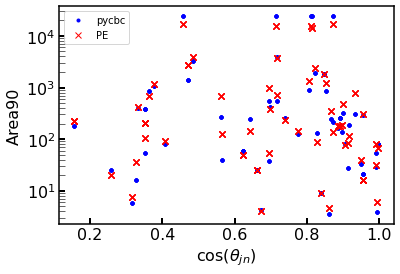

In [6]:
ls = glob('/Users/viraj/winter/gwemopt_sims/output_parallel/*.csv')
A90 = []
pethetas = []
peA90 = []
thetas = []
distances = []
pe_distances = []

for l in ls:
    rate = l.split('/')[-1].split('_')[0]
    isGal = int(l.split('/')[-1].split('_')[2].split('isGal')[-1])
    if isGal==1:
        #with open('/Users/viraj/gwemlightcurves/output/bns_samples_%s_catalog_Jband.pickle'%(rate),'rb') as f:
        #    dat = pickle.load(f)
        continue
        #dat = Table.read('/Users/viraj/gwemlightcurves/output/bns_samples_%s_catalog_ejecta_masses.dat'%(rate),format='ascii')
        
    else:
        with open('/Users/viraj/gwemlightcurves/output/bns_samples_%s_Jband.pickle'%(rate),'rb') as f:
            dat = pickle.load(f)
        #dat = Table.read('/Users/viraj/gwemlightcurves/output/bns_samples_%s_ejecta_masses.dat'%(rate),format='ascii')
            
    lccrds = SkyCoord(ra=dat['ra'],dec=dat['dec'],unit=(u.radian,u.radian))
    
    isPe = int(l.split('/')[-1].split('_')[1].split('isPE')[-1])
    
    t = Table.read(l)
    crds = SkyCoord(ra=t['ra'],dec=t['dec'],unit=(u.deg,u.deg))
    idx,d2d,d3d = crds.match_to_catalog_sky(lccrds)
    dat = dat[idx]
    #print(d2d)
    if isPe==1:
        
        for ind in range(len(t)):
            pethetas.append(dat[ind]['theta_jn'])
            peA90.append(t[ind]['area90'])
            if t[ind]['area90'] ==0:
                print(t[ind]['distance'])
            pe_distances.append(t[ind]['distance'])
        
    else:
        for ind in range(len(t)):
            thetas.append(dat[ind]['theta_jn'])
            A90.append(t[ind]['area90'])
            distances.append(t[ind]['distance'])        
A90 = np.array(A90)
peA90 = np.array(peA90)
thetas = np.array(thetas)
pethetas = np.array(pethetas)

plt.plot(np.abs(np.cos(thetas)),A90,'.',c='blue',label='pycbc')
plt.plot(np.abs(np.cos(thetas)),A90,'.',c='blue')

plt.plot(np.abs(np.cos(pethetas)),peA90,'x',c='red',label='PE')
plt.plot(np.abs(np.cos(pethetas)),peA90,'x',c='red')



plt.yscale('log')
plt.legend(fontsize=10)
plt.xlabel(r'cos($\theta_{jn}$)')
plt.ylabel(r'Area90')
#plt.savefig(r'theta_A90_1.pdf',bbox_inches='tight')

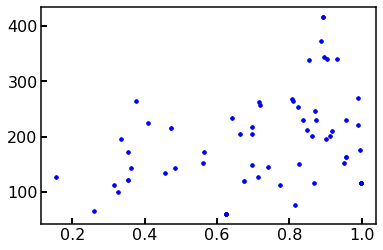

In [8]:
plt.plot(np.abs(np.cos(thetas)),distances,'.',c='blue')


In [14]:
np.unique(np.arccos(np.abs(np.cos(thetas)))*180/np.pi)

array([ 4.01400815,  5.66079142,  7.77481813,  8.06401156, 16.99208691,
       17.00978436, 18.00516238, 21.24470016, 23.40579027, 24.0112735 ,
       25.28370486, 25.83485555, 26.32700554, 26.80824358, 27.47679023,
       29.15216991, 29.33288527, 29.87260256, 30.44672259, 31.40503272,
       31.9187994 , 33.05273705, 34.1613424 , 34.62285375, 35.43257655,
       35.89145317, 36.16977171, 39.2555548 , 42.2579595 , 44.04547949,
       44.26885816, 44.39793328, 45.74930506, 45.89198028, 45.91909639,
       47.61342572, 48.50119428, 50.04437586, 51.3506148 , 55.61290305,
       55.82400947, 61.03718753, 61.86678952, 62.80751381, 65.87598187,
       67.88600199, 68.70225547, 69.33249482, 69.36173921, 70.52121799,
       70.89863086, 71.58184137, 75.0208062 , 81.03504812])

In [16]:
len(np.unique(distances))

54

In [489]:
plot_bins = np.array([0,0.25,0.5,0.75,1])
bins = np.array([0,0.2,0.4,0.6,0.8,1])
inds = np.digitize(np.abs(np.cos(thetas)),bins)
inds

array([5, 3, 5, 5, 5, 5, 5, 2, 4, 4, 5, 4, 4, 5, 2, 5, 4, 4, 2, 5, 4, 5,
       5, 2, 5, 2, 5, 5, 5, 5, 1, 3, 5, 4, 5, 4, 2, 2, 3, 5, 5, 4, 5, 5,
       4, 5, 5, 5, 3, 4, 3, 5, 3, 2, 2, 4, 4, 4, 2, 2, 5, 4, 4, 4, 5, 5,
       5, 5, 5, 5, 3, 5, 5, 5, 5, 4, 5, 5, 2, 2, 3, 5, 5, 3, 4, 3, 3, 5,
       5, 4, 2, 5, 2, 3, 5, 5, 2, 4, 5, 5, 4, 4, 5, 5, 1, 5, 5, 5])

In [490]:
distances = np.array(distances)
bin_dists = []
ntot = []
for i in range(1,6):
    bin_dists.append(np.median(distances[np.where(inds==i)[0]]))
    ntot.append(len(distances[np.where(inds==i)[0]]))
    
ntot = np.array(ntot)

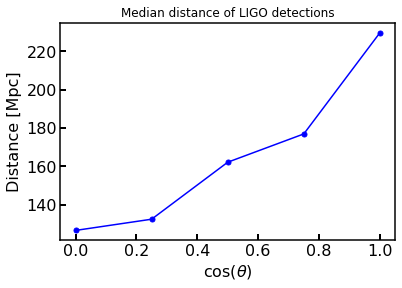

In [571]:
plt.plot(plot_bins,bin_dists,c='blue',markersize=10,marker='.')
plt.xlabel(r'cos($\theta$)')
plt.ylabel(r'Distance [Mpc]')
plt.title(r'Median distance of LIGO detections',size=12)
plt.savefig('dist_theta.png',bbox_inches='tight')

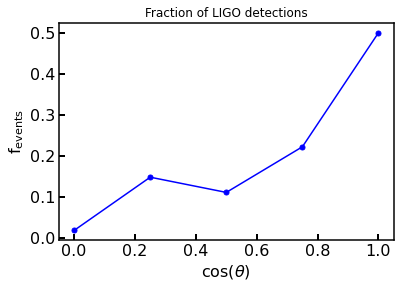

In [585]:
plt.plot(plot_bins,ntot/len(distances),marker='.',c='blue',markersize=10)
plt.xlabel(r'cos($\theta$)')
plt.ylabel(r'f$_{\rm{events}}$')
plt.title(r'Fraction of LIGO detections',size=12)
plt.savefig(r'events_theta.png',bbox_inches='tight')

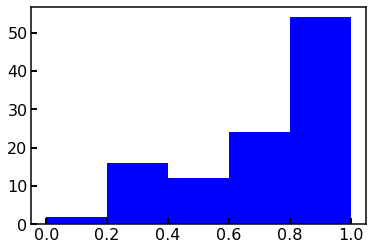

In [576]:
#plt.plot(plot_bins,ntot/len(distances),'.',c='blue')
hist, plotbins,x = plt.hist(np.abs(np.cos(thetas)),bins=bins,color='blue')


In [493]:
hist/np.sum(hist)

array([0.01851852, 0.14814815, 0.11111111, 0.22222222, 0.5       ])

In [586]:
np.unique(J['phi'])

30.0
37.5
45.0
52.5
60.0


In [628]:
cmap = colors.LinearSegmentedColormap.from_list("",['ghostwhite','cornflowerblue','darkblue'])
tablelist = [r,J]
cols = ['red','orange']
labs = ['r','J']

fig = plt.figure(figsize=(25,15))
gs = GridSpec(2,2,hspace=0.5,wspace=0.2)
dist = np.array(bin_dists[::-1]) #Mpc
DMs = 5*np.log10(dist*1e6/10)
pmarrays = []
axs = []

gs1 = gs[0].subgridspec(1,2,wspace=0.1)


phi_plots = [phis[0],phis[2]]
theta_plot_lims = [(0,60),(60,90)]
enum = -1
fracs_det_r = [[],[]]
fracs_det_J = [[],[]]
for phi_ind in range(len(phi_plots)):
    phi_val = phi_plots[phi_ind]
    frac_det_r = []
    frac_det_J = []
    for theta_ind in range(len(np.unique(J['theta']))):
        theta_lim = np.unique(J['theta'])[theta_ind]
        enum = enum+1
        pmarrays = []
        is_dets = [[],[]]
        #gs1 = gs[enum].subgridspec(1,2,wspace=0.1)
        t_21_filts = [[],[]]
        tinit_filts = [[],[]]
        
        DM = DMs[theta_ind]
        print(theta_lim,DM)
        for ind in range(len(tablelist)):
            t = tablelist[ind]
            phi = phi_val
            t1 = t[(t['theta']==theta_lim) & (t['phi']==phi)]
            pmarray = []
            tinits = []
            t_21s = []
            for md in mej_dyns:
                t2 = t1[t1['mej_dyn']==md]
                t2.sort('mej_wind')
                t2 = t2.group_by('mej_wind')
                pmbins = []
                t21_bins = []
                tinit_bins = []
                for grp in t2.groups:
                    t21 = []
                    tinit = []
                    for row in grp:
                        if ind==0:
                            a = row['t'][row['mag'][0]+DM < 22]
                        else:
                            a = row['t'][row['mag'][0]+DM < 21]
                        if len(a) == 0:
                            t21.append(0)
                            tinit.append(0)
                        else:
                            t21.append(a[-1]-a[0])
                            tinit.append(a[0])
                        
                    t21_bins.append(np.max(t21))
                    tinit_bins.append(np.min(tinit))
                    pmbins.append(np.min(grp['peak_mag'])+DM)
                pmarray.append(pmbins)
                tinits.append(tinit_bins)
                t_21s.append(t21_bins)
                #plt.plot(t1['theta'],t1['peak_mag'],'.',c=cols[ind])
            pmarray = np.array(pmarray)
            t_21s = np.array(t_21s)
            tinits = np.array(tinits)
            #ax = fig.add_subplot(gs[ind])
            
            if ind == 0:
                is_det = (pmarray<22) & (t_21s>1)
            else:
                is_det = (pmarray<21) & (t_21s>3)
            is_dets[ind].append(is_det)            
        #is_detected_r = 
        #is_detected_J = 
        frac_det_r.append(np.sum(is_dets[0])/225)
        frac_det_J.append(np.sum(is_dets[1])/225)
    fracs_det_r[phi_ind] = frac_det_r
    fracs_det_J[phi_ind] = frac_det_J
    

0.0 36.80492866469286
41.40962210927086 36.23857246730589
60.00000000000001 36.04960178878122
75.52248781407008 35.610399997130095
90.0 35.51243903783472
0.0 36.80492866469286
41.40962210927086 36.23857246730589
60.00000000000001 36.04960178878122
75.52248781407008 35.610399997130095
90.0 35.51243903783472


<Figure size 1800x1080 with 0 Axes>

In [629]:
fracs_det_J, fracs_det_r

([[0.4088888888888889, 0.64, 0.52, 0.44, 0.38222222222222224],
  [0.43555555555555553,
   0.6,
   0.48444444444444446,
   0.6044444444444445,
   0.6133333333333333]],
 [[0.9955555555555555, 1.0, 1.0, 1.0, 1.0],
  [0.9866666666666667,
   0.9955555555555555,
   0.9866666666666667,
   0.9955555555555555,
   0.9911111111111112]])

In [630]:
fracs_det_J, fracs_det_r

([[0.4088888888888889, 0.64, 0.52, 0.44, 0.38222222222222224],
  [0.43555555555555553,
   0.6,
   0.48444444444444446,
   0.6044444444444445,
   0.6133333333333333]],
 [[0.9955555555555555, 1.0, 1.0, 1.0, 1.0],
  [0.9866666666666667,
   0.9955555555555555,
   0.9866666666666667,
   0.9955555555555555,
   0.9911111111111112]])

In [631]:
np.abs(np.cos(thetas))

array([0.99754697, 0.45698128, 0.99011196, 0.8962775 , 0.95625481,
       0.91771449, 0.89252094, 0.32724048, 0.71449792, 0.69567341,
       0.99080739, 0.69779915, 0.69601331, 0.80727179, 0.37645061,
       0.85350503, 0.67412933, 0.71607224, 0.35294426, 0.83816891,
       0.74012472, 0.9951233 , 0.87178824, 0.35246665, 0.90005383,
       0.25846826, 0.90420406, 0.8101291 , 0.91346541, 0.82745962,
       0.15583026, 0.40871308, 0.88719781, 0.64219411, 0.87332903,
       0.7743313 , 0.31594975, 0.36321455, 0.48424185, 0.86210073,
       0.93204139, 0.62455298, 0.82290981, 0.84879826, 0.66260444,
       0.95102867, 0.95634513, 0.8147983 , 0.56173675, 0.71878818,
       0.56478117, 0.86713501, 0.47152311, 0.33345775, 0.35294426,
       0.71607224, 0.67412933, 0.69601331, 0.32724048, 0.37645061,
       0.99080739, 0.71449792, 0.69779915, 0.69567341, 0.80727179,
       0.85350503, 0.89252094, 0.99754697, 0.99011196, 0.95625481,
       0.45698128, 0.91771449, 0.8962775 , 0.84879826, 0.82290

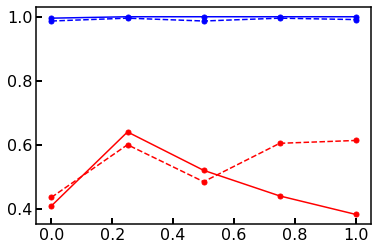

In [632]:
plt.plot(plot_bins,fracs_det_J[0],marker='.',markersize=10,c='red')
plt.plot(plot_bins,fracs_det_J[1],marker='.',markersize=10,c='red',linestyle='--')

plt.plot(plot_bins,fracs_det_r[0],marker='.',markersize=10,c='blue')
plt.plot(plot_bins,fracs_det_r[1],marker='.',markersize=10,c='blue',linestyle='--')
#plt.savefig('1day.png',bbox_inches='tight')

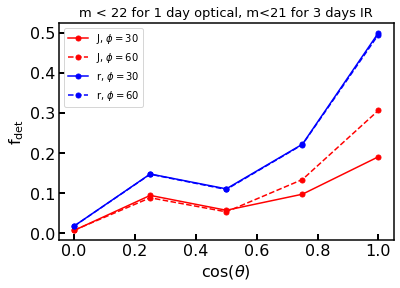

In [636]:
factor = hist/np.sum(hist)
plt.plot(plot_bins,fracs_det_J[0]*factor,marker='.',markersize=10,c='red',label='J, $\phi=30$')
plt.plot(plot_bins,fracs_det_J[1]*factor,marker='.',markersize=10,c='red',linestyle='--',label='J, $\phi=60$')

plt.plot(plot_bins,fracs_det_r[0]*factor,marker='.',markersize=10,c='blue',label='r, $\phi=30$')
plt.plot(plot_bins,fracs_det_r[1]*factor,marker='.',markersize=10,c='blue',linestyle='--',label='r, $\phi=60$')

#plt.title('m < 21 for 3 days',size=13)
plt.title('m < 22 for 1 day optical, m<21 for 3 days IR',size=13)
plt.xlabel(r'cos($\theta$)')
plt.ylabel(r'f$_{\rm{det}}$')

plt.legend(fontsize=10)
plt.savefig('3day_combined_ZTF_22_WINTER.png',bbox_inches='tight')

In [532]:
print(fracs_det_J[0]*factor)

[0.0162963  0.14222222 0.10123457 0.20246914 0.43555556]


In [526]:
print(fracs_det_J[0]*factor)

[0.01613169 0.14024691 0.10320988 0.20740741 0.44888889]


realistic
realistic 3 16
pessimistic
pessimistic 4 19
optimistic
optimistic 13 54


Text(0, 0.5, 'Area90')

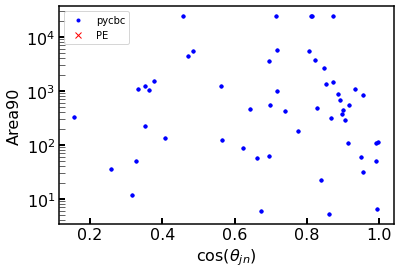

In [341]:
ls = ['/Users/viraj/winter/gwemopt_sims/output_parallel/realistic_isPE0_isGal0_isGalTiling0_1days.csv','/Users/viraj/winter/gwemopt_sims/output_parallel/pessimistic_isPE0_isGal0_isGalTiling0_1days.csv','/Users/viraj/winter/gwemopt_sims/output_parallel/optimistic_isPE0_isGal0_isGalTiling0_1days.csv']
A90 = []
pethetas = []
peA90 = []
thetas = []

for l in ls:
    rate = l.split('/')[-1].split('_')[0]
    print(rate)
    isGal = int(l.split('/')[-1].split('_')[2].split('isGal')[-1])
    if isGal==1:
        with open('/Users/viraj/gwemlightcurves/output/bns_samples_%s_catalog_Jband.pickle'%(rate),'rb') as f:
            dat = pickle.load(f)
        
        #dat = Table.read('/Users/viraj/gwemlightcurves/output/bns_samples_%s_catalog_ejecta_masses.dat'%(rate),format='ascii')
        
    else:
        with open('/Users/viraj/gwemlightcurves/output/bns_samples_%s_Jband.pickle'%(rate),'rb') as f:
            dat = pickle.load(f)
        #dat = Table.read('/Users/viraj/gwemlightcurves/output/bns_samples_%s_ejecta_masses.dat'%(rate),format='ascii')
            
    lccrds = SkyCoord(ra=dat['ra'],dec=dat['dec'],unit=(u.radian,u.radian))
    
    isPe = int(l.split('/')[-1].split('_')[1].split('isPE')[-1])
    
    t = Table.read(l)
    crds = SkyCoord(ra=t['ra'],dec=t['dec'],unit=(u.deg,u.deg))
    idx,d2d,d3d = crds.match_to_catalog_sky(lccrds)
    dat = dat[idx]
    #print(d2d)
    if isPe==1:
        
        for ind in range(len(t)):
            pethetas.append(dat[ind]['theta_jn'])
            peA90.append(t[ind]['area90'])
            if t[ind]['area90'] ==0:
                print(t[ind]['distance'])
        
    else:
        for ind in range(len(t)):
            thetas.append(dat[ind]['theta_jn'])
            A90.append(t[ind]['area90'])
    
    th1 = np.array(thetas)
    print(rate,len(th1[np.abs(np.cos(th1))<0.5]),len(th1))
A90 = np.array(A90)
peA90 = np.array(peA90)
thetas = np.array(thetas)
pethetas = np.array(pethetas)

plt.plot(np.abs(np.cos(thetas)),A90,'.',c='blue',label='pycbc')
plt.plot(np.abs(np.cos(thetas)),A90,'.',c='blue')

plt.plot(np.abs(np.cos(pethetas)),peA90,'x',c='red',label='PE')
plt.plot(np.abs(np.cos(pethetas)),peA90,'x',c='red')



plt.yscale('log')
plt.legend(fontsize=10)
plt.xlabel(r'cos($\theta_{jn}$)')
plt.ylabel(r'Area90')
#plt.savefig(r'theta_A90_1.pdf',bbox_inches='tight')

In [197]:
ls = glob('/Users/viraj/winter/gwemopt_sims/output_parallel/realistic*.csv')

ztf_times = []
winter_times = []

for l in ls:
    winter= Table.read(l)
    ids = np.argsort(winter['event'])
    winter = winter[ids]
    ztf_file = '/Users/viraj/winter/gwemopt_sims/output_parallel/ZTF/%s'%(l.split('/')[-1])
    ztf = Table.read(ztf_file)
    ids = np.argsort(ztf['event'])
    ztf = ztf[ids]
    
    ztf_tlocs = np.zeros(len(ztf)) - 99
    winter_tlocs = np.zeros(len(winter)) - 99
    
    ztf_loc_ids = (ztf['is_localized'] == True)
    ztf_tlocs[ztf_loc_ids] = ztf[ztf_loc_ids]['hours_to_detection']
    winter_loc_ids = (winter['is_localized'] == True)
    winter_tlocs[winter_loc_ids] = winter[winter_loc_ids]['hours_to_detection']
    
    m = ztf_tlocs[winter_tlocs>0]<0
    if(len(ztf_tlocs[winter_tlocs>0][m])>0):
        print(winter_tlocs[winter_tlocs>0][m])
        print(l)
    
    #if len(winter_tlocs[winter_tlocs > 100])>0:
    #    print(l)
    
    winter_times = np.concatenate([winter_times,winter_tlocs])
    
    ztf_times = np.concatenate([ztf_times,ztf_tlocs])

[ 85.63614902 161.40508428]
/Users/viraj/winter/gwemopt_sims/output_parallel/realistic_isPE0_isGal1_isGalTiling1_7days.csv
[21.98596246]
/Users/viraj/winter/gwemopt_sims/output_parallel/realistic_isPE0_isGal0_isGalTiling0_7days.csv
[85.63614902 89.62372428]
/Users/viraj/winter/gwemopt_sims/output_parallel/realistic_isPE1_isGal1_isGalTiling1_7days.csv
[21.98596246]
/Users/viraj/winter/gwemopt_sims/output_parallel/realistic_isPE0_isGal0_isGalTiling0_1days.csv


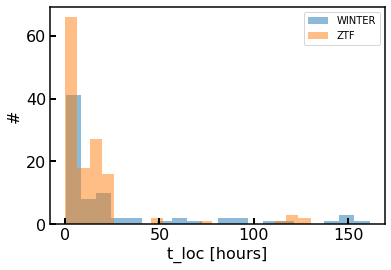

In [167]:
plt.hist(winter_times[winter_times>0],alpha=0.5,bins=20,label='WINTER')
plt.hist(ztf_times[ztf_times>0],alpha=0.5,bins=20,label='ZTF')
#plt.xscale('log')
#plt.xlim(0,50)
plt.xlabel('t_loc [hours]')
plt.ylabel('#')
plt.legend(fontsize=10)

(array([ 1.,  5., 49.,  8.,  1.,  2.,  0.,  3.,  1.,  2.]),
 array([-49.86552 , -30.651432, -11.437344,   7.776744,  26.990832,
         46.20492 ,  65.419008,  84.633096, 103.847184, 123.061272,
        142.27536 ]),
 <BarContainer object of 10 artists>)

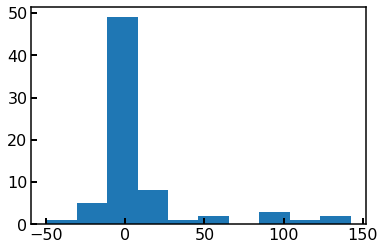

In [190]:
locs = (winter_times>0) & (ztf_times>0)
plt.hist(winter_times[locs]-ztf_times[locs])

In [196]:
m = ztf_times[winter_times>0]<0
ztf_times[winter_times>0][m], winter_times[winter_times>0][m]


(array([-99., -99., -99., -99., -99., -99.]),
 array([ 85.63614902, 161.40508428,  21.98596246,  85.63614902,
         89.62372428,  21.98596246]))

In [162]:
ndets_winter = {}
ndets_ztf = {}
for phi in [30,45,60]:
    ls = glob('/Users/viraj/winter/gwemopt_sims/output_parallel/Bulla/*_phi%s.csv'%(phi))
    ndet_w = 0
    ndet_z = 0
    for l in ls:
        t = Table.read(l) 
        ndet_w = ndet_w + len(t[t['is_detected_winter']==True])
        ndet_z = ndet_z + len(t[t['is_detected_ztf']==True])
    ndets_winter['%s'%(phi)] = ndet_w
    ndets_ztf['%s'%(phi)] = ndet_z

In [175]:
print('$\phi$\tZTF\tWINTER')
print('30\t%i\t%i'%(ndets_ztf['30'],ndets_winter['30']))
print('45\t%i\t%i'%(ndets_ztf['45'],ndets_winter['45']))
print('60\t%i\t%i'%(ndets_ztf['60'],ndets_winter['60']))

$\phi$	ZTF	WINTER
30	148	105
45	129	111
60	118	117


In [163]:
ndets_winter

{'30': 105, '45': 111, '60': 117}

In [164]:
ndets_ztf

{'30': 148, '45': 129, '60': 118}

# Plot lightcurve

In [265]:
sch = Table.read('/Users/viraj/winter/gwemopt_sims/output_parallel/Bulla/realistic_isPE0_isGal0_isGalTiling0_1days_phi60.csv')

In [269]:
crds = SkyCoord(ra=255.7365652392762,dec=47.61818433302595,unit=(u.deg,u.deg))

In [289]:
with open('/Users/viraj/gwemlightcurves/output/bns_samples_realistic_Jband.pickle','rb') as f:
    lc = pickle.load(f)

with open('/Users/viraj/gwemlightcurves/output/bns_samples_realistic_rband.pickle','rb') as f:
    opt_lc = pickle.load(f)

In [290]:
lc_crds = SkyCoord(ra=lc['ra'],dec=lc['dec'],unit=(u.rad,u.rad))
opt_lc_crds =  SkyCoord(ra=opt_lc['ra'],dec=opt_lc['dec'],unit=(u.rad,u.rad))

In [291]:
idx,d2d,d3d = crds.match_to_catalog_sky(lc_crds)

o_idx, o_d2d, o_d3d = crds.match_to_catalog_sky(opt_lc_crds)

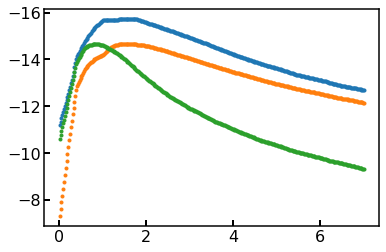

In [292]:
plt.plot(lc[idx]['t'],lc[idx]['mag'][0],'.')
plt.plot(lc[idx]['t'],lc[idx+1]['mag'][0],'.')
plt.plot(opt_lc[idx]['t'],opt_lc[idx]['mag'][0],'.')
plt.gca().invert_yaxis()

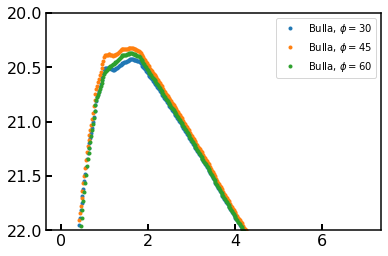

In [308]:
lcs = {}
lcs['DM'] = 5*np.log10(lc[idx]['luminosity_distance_Mpc']*1e6/10)
lcs['Bulla_t'] = lc[idx]['t']
lcs['ra'] = 255.7365652392762 
lcs['dec'] = 47.61818433302595
for phi in [30,45,60]:
    with open('/Users/viraj/gwemlightcurves/output/bns_samples_realistic_Jband_phi%s.pickle'%(phi),'rb') as f:
        lc = pickle.load(f)
    lc_crds = SkyCoord(ra=lc['ra'],dec=lc['dec'],unit=(u.rad,u.rad))
    idx,d2d,d3d = crds.match_to_catalog_sky(lc_crds)
    DM = 5*np.log10(lc[idx]['luminosity_distance_Mpc']*1e6/10)
    
    lcs['Bulla_%s'%(phi)] = lc[idx]['mag'][0]
    plt.plot(lc[idx]['t'],lc[idx]['mag'][0]+DM,'.',label=r'Bulla, $\phi = %s$'%(phi))
    plt.ylim(22,20)
    plt.legend(fontsize=10)

In [309]:
with open('plot_Bulla_lc.pickle','wb') as f:
    pickle.dump(lcs,f)

In [310]:
with open('plot_Bulla_lc.pickle','rb') as f:
    l = pickle.load(f)

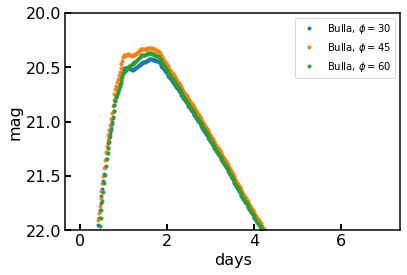

In [320]:
for phi in [30,45,60]:
    plt.plot(lcs['Bulla_t'],lcs['Bulla_%s'%(phi)]+lcs['DM'],'.',label=r'Bulla, $\phi = %s$'%(phi))
    plt.ylim(22,20)
    plt.legend(fontsize=10)
    
plt.xlabel('days')
plt.ylabel('mag')
plt.savefig('lcs_plot.pdf')

In [321]:
sch

event,distance,ra,dec,theta_jn,is_localized_winter,is_localized_ZTF,mag_threshold,airmass,pointings_to_detection_winter,hours_to_detection_winter,area90,pointings_to_detection_ztf,hours_to_detection_ztf,peak_mag_J,peak_mag_r,mag_at_detection_J,mag_used_J,mag_at_detection_r,mag_used_r,SNR_J_at_detection,SNR_J_at_1800s,is_detected_winter,is_detected_ztf
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
181.0,216.8265690149866,150.18981296631182,-0.5002496878613357,0.800966156104154,1.0,1.0,21.0,1.55651,71.0,22.56752566400657,62.160185598452045,8.0,17.364565664040597,21.144268070337258,21.71871742901812,21.46598433211169,21.46598433211169,21.788604676076698,21.788604676076698,3.5651191993366234,8.75553007911478,0.0,0.0
10.0,100.28942703308223,348.17789153309644,42.5066297424796,1.9041781099012869,1.0,1.0,21.0,1.02203,18.0,1.5501051596634905,50.245330402715,3.0,0.08322515952530196,19.957943852575777,20.457601055132585,26.57672085860278,26.57672085860278,25.536625247446544,25.536625247446544,0.03702966521354964,0.09101757441948129,0.0,0.0
188.0,264.14160231900587,145.4237275121413,63.5975966431269,1.1848342507166756,0.0,1.0,0.0,0.0,0.0,0.0,1544.9297774224551,67.0,23.629923443172075,-99.0,22.429408858760166,-99.0,-99.0,22.444141696436475,22.444141696436475,-99.0,-99.0,0.0,0.0
22.0,221.29599478720382,43.21801145994791,20.416884093730246,3.0058964784422155,0.0,1.0,0.0,0.0,0.0,0.0,106.19031706402224,4.0,12.929494725227508,-99.0,21.864845619588078,-99.0,-99.0,22.188798151155574,22.188798151155574,-99.0,-99.0,0.0,0.0
191.0,205.4005932952305,71.50741539718905,82.90961229089666,2.3401532321111302,1.0,0.0,21.0,2.00065,98.0,21.985962461316443,3601.6188550124193,0.0,0.0,21.72013996460707,-99.0,22.16413463754925,22.16413463754925,-99.0,-99.0,1.6675191677691217,4.093008859601882,0.0,1.0
60.0,338.1538562978532,299.5173729426362,9.212227417954136,2.5934714308929543,0.0,1.0,0.0,0.0,0.0,0.0,1340.1945838437562,50.0,1.3889059903627896,-99.0,22.93367698154013,-99.0,-99.0,27.486179477475584,27.486179477475584,-99.0,-99.0,0.0,0.0
107.0,417.03606014880205,19.66028482927023,25.118505696998906,2.6737005363639366,1.0,1.0,21.0,2.47353,53.0,20.264399260832256,685.8897821132148,27.0,0.7499992608467841,23.305104056283895,23.377434202653195,23.955743151212626,23.955743151212626,28.230192500196225,28.230192500196225,0.28219071119325795,0.6923314805254124,0.0,0.0
24.0,115.76661933630648,197.6698591108632,19.09047308500463,0.07005765840332269,1.0,1.0,21.0,1.95928,8.0,2.7852680308379547,111.93751143923777,5.0,2.2351880307643057,19.973900456719534,20.15244721780377,24.725380559904657,24.725380559904657,23.834883541450953,23.834883541450953,0.15941839154090598,0.39131910249034285,0.0,0.0
171.0,269.08517617009744,350.9885293466172,-8.244782864521877,0.14074355257555757,1.0,1.0,21.0,2.0039,5.0,0.4305780365703522,49.21670391371108,5.0,0.13897803651531238,21.457068815847634,21.924302327552823,26.054857944785642,26.054857944785642,26.246803331321225,26.246803331321225,0.04630224097574802,0.11365096268438815,0.0,0.0
